# Example 13.4: Constant Composition Expansion

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
A mixture having a molar composition of 66% $\mathrm{N_2}$, 17% $\mathrm{CO_2}$, 17% $\mathrm{H_2O}$ enters a turbine at 1000 K, 8 bar with a mass flow rate of 2 kg/s.  The mixture expands isentropically to 1 bar.  Determine the exit temperature and the power output.

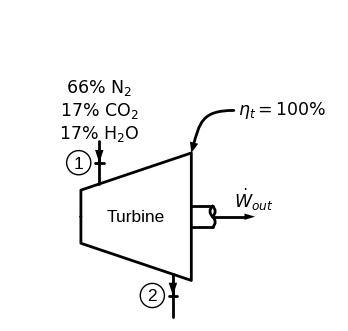

In [3]:
from kilojoule.templates.default import *
from kilojoule.schemdraw import *
with schemdraw.Drawing() as d:
    d += elm.Gap().down(3).label('$66\%\ \mathrm{N_2}$\n$17\%\ \mathrm{CO_2}$\n$17\%\ \mathrm{H_2O}$')
    d += thermo.Pipe().down().state_label('1')
    d += (turbine := thermo.Turbine().right().label('Turbine',loc='center',ofst=0))
    d += thermo.Shaft().right().at(turbine.E)
    d += elm.Arrow().right(1).label('$\dot{W}_{out}$',halign='left')
    d += thermo.Pipe().at(turbine.outbot).down().state_label('2')
    d += elm.Annotate().at(turbine.NE).delta(1,1).label('$\eta_t=100\%$')
    

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=3074207&node=10465108&a=1659172912&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [3]:
from kilojoule.templates.default import *
   
N2 = idealgas.Properties('N2')
CO2 = idealgas.Properties('CO2')
H2O = idealgas.Properties('H2O')

# Universal gas constant
Rbar = Quantity(8.3145,'kJ/kmol/K')

T.set_units('K')

### Given

In [4]:
T_room = Quantity(25,'degC')
T[1] = Quantity(1000,'K')
p[1] = Quantity(8,'bar')
p[2] = Quantity(1,'bar')
mdot = Quantity(2,'kg/s')
y['N2'] = 0.66
y['CO2'] = 0.17
y['H2O'] = 0.17
y['mix'] = y['N2'] + y['CO2'] + y['H2O']

Summary();

<IPython.core.display.Latex object>

,$T$ [K],$p$ [kPa],$y$ []
1,1000.0,800.0,-
2,-,100.0,-
CO2,-,-,0.17
H2O,-,-,0.17
N2,-,-,0.66
mix,-,-,1.0


### Mixture Properties

In [5]:
%%showcalc
"Molar Mass"
M['N2'] = N2.mm
M['CO2'] = CO2.mm
M['H2O'] = H2O.mm
M['mix'] = y['N2']*M['N2'] + y['CO2']*M['CO2'] + y['H2O']*M['H2O']

"Mass fraction"
mf['N2'] = y['N2']*M['N2']/M['mix']
mf['CO2'] = y['CO2']*M['CO2']/M['mix']
mf['H2O'] = y['H2O']*M['H2O']/M['mix']
mf['mix'] = mf['N2'] + mf['CO2'] + mf['H2O']

"Constant pressure specific heat"
c_p['N2'] = N2.cp(T_room)
c_p['CO2'] = CO2.cp(T_room)
c_p['H2O'] = H2O.cp(T_room)
c_p['mix'] = mf['N2']*c_p['N2'] + mf['CO2']*c_p['CO2'] + mf['H2O']*c_p['H2O']

"Constant volume specific heat"
c_v['N2'] = N2.cv(T_room)
c_v['CO2'] = CO2.cv(T_room)
c_v['H2O'] = H2O.cv(T_room)
c_v['mix'] = mf['N2']*c_v['N2'] + mf['CO2']*c_v['CO2'] + mf['H2O']*c_v['H2O']

"Specific heat ratio"
k['mix'] = c_p['mix']/c_v['mix']

Molar Mass
\begin{align}
  {M}_{ {N2} } &=  \underset{ N2 }{ mm }  = 28.013\ \frac{\mathrm{kg}}{\mathrm{kmol}} 
\end{align}

\begin{align}
  {M}_{ {CO2} } &=  \underset{ CO2 }{ mm }  = 44.01\ \frac{\mathrm{kg}}{\mathrm{kmol}} 
\end{align}

\begin{align}
  {M}_{ {H2O} } &=  \underset{ H2O }{ mm }  = 18.015\ \frac{\mathrm{kg}}{\mathrm{kmol}} 
\end{align}

\begin{align}
  {M}_{ {mix} } &=   {y}_{ {N2} }  \cdot  {M}_{ {N2} }  +  {y}_{ {CO2} }  \cdot  {M}_{ {CO2} }  +  {y}_{ {H2O} }  \cdot  {M}_{ {H2O} }  \\
    &=  0.66  \cdot  28.013\ \frac{\mathrm{kg}}{\mathrm{kmol}}  +  0.17  \cdot  44.01\ \frac{\mathrm{kg}}{\mathrm{kmol}}  +  0.17  \cdot  18.015\ \frac{\mathrm{kg}}{\mathrm{kmol}} \\
    &= 29.033\ \frac{\mathrm{kg}}{\mathrm{kmol}}
\end{align}

Mass fraction
\begin{align}
  {mf}_{ {N2} } &=  \frac{  {y}_{ {N2} }  \cdot  {M}_{ {N2} }  }{ {M}_{ {mix} } } \\
    &= \frac{  0.66  \cdot  28.013\ \frac{\mathrm{kg}}{\mathrm{kmol}}  }{ 29.033\ \frac{\mathrm{kg}}{\mathrm{kmol}} }\\
    &= 0.63682
\end{align}

\begin{align}
  {mf}_{ {CO2} } &=  \frac{  {y}_{ {CO2} }  \cdot  {M}_{ {CO2} }  }{ {M}_{ {mix} } } \\
    &= \frac{  0.17  \cdot  44.01\ \frac{\mathrm{kg}}{\mathrm{kmol}}  }{ 29.033\ \frac{\mathrm{kg}}{\mathrm{kmol}} }\\
    &= 0.25769
\end{align}

\begin{align}
  {mf}_{ {H2O} } &=  \frac{  {y}_{ {H2O} }  \cdot  {M}_{ {H2O} }  }{ {M}_{ {mix} } } \\
    &= \frac{  0.17  \cdot  18.015\ \frac{\mathrm{kg}}{\mathrm{kmol}}  }{ 29.033\ \frac{\mathrm{kg}}{\mathrm{kmol}} }\\
    &= 0.10549
\end{align}

\begin{align}
  {mf}_{ {mix} } &=  {mf}_{ {N2} } + {mf}_{ {CO2} } + {mf}_{ {H2O} } \\
    &= 0.63682 + 0.25769 + 0.10549\\
    &= 1.0
\end{align}

Constant pressure specific heat
\begin{align}
  {c_{p}}_{ {N2} } &=  \mathrm{ \underset{ N2 }{ cp } }\left( T_{room} \right)  = \mathrm{ \underset{ N2 }{ cp } }\left( 25\ \mathrm{°C} \right) = 1.0396\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

\begin{align}
  {c_{p}}_{ {CO2} } &=  \mathrm{ \underset{ CO2 }{ cp } }\left( T_{room} \right)  = \mathrm{ \underset{ CO2 }{ cp } }\left( 25\ \mathrm{°C} \right) = 0.84379\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

\begin{align}
  {c_{p}}_{ {H2O} } &=  \mathrm{ \underset{ H2O }{ cp } }\left( T_{room} \right)  = \mathrm{ \underset{ H2O }{ cp } }\left( 25\ \mathrm{°C} \right) = 1.8644\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

\begin{align}
  {c_{p}}_{ {mix} } &=   {mf}_{ {N2} }  \cdot  {c_{p}}_{ {N2} }  +  {mf}_{ {CO2} }  \cdot  {c_{p}}_{ {CO2} }  +  {mf}_{ {H2O} }  \cdot  {c_{p}}_{ {H2O} }  \\
    &=  0.63682  \cdot  1.0396\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}  +  0.25769  \cdot  0.84379\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}  +  0.10549  \cdot  1.8644\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \\
    &= 1.0762\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

Constant volume specific heat
\begin{align}
  {c_{v}}_{ {N2} } &=  \mathrm{ \underset{ N2 }{ cv } }\left( T_{room} \right)  = \mathrm{ \underset{ N2 }{ cv } }\left( 25\ \mathrm{°C} \right) = 0.74285\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

\begin{align}
  {c_{v}}_{ {CO2} } &=  \mathrm{ \underset{ CO2 }{ cv } }\left( T_{room} \right)  = \mathrm{ \underset{ CO2 }{ cv } }\left( 25\ \mathrm{°C} \right) = 0.65487\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

\begin{align}
  {c_{v}}_{ {H2O} } &=  \mathrm{ \underset{ H2O }{ cv } }\left( T_{room} \right)  = \mathrm{ \underset{ H2O }{ cv } }\left( 25\ \mathrm{°C} \right) = 1.4029\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

\begin{align}
  {c_{v}}_{ {mix} } &=   {mf}_{ {N2} }  \cdot  {c_{v}}_{ {N2} }  +  {mf}_{ {CO2} }  \cdot  {c_{v}}_{ {CO2} }  +  {mf}_{ {H2O} }  \cdot  {c_{v}}_{ {H2O} }  \\
    &=  0.63682  \cdot  0.74285\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}  +  0.25769  \cdot  0.65487\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}  +  0.10549  \cdot  1.4029\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \\
    &= 0.7898\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

Specific heat ratio
\begin{align}
  {k}_{ {mix} } &=  \frac{ {c_{p}}_{ {mix} } }{ {c_{v}}_{ {mix} } } \\
    &= \frac{ 1.0762\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} }{ 0.7898\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} }\\
    &= 1.3626
\end{align}



In [6]:
Summary();

<IPython.core.display.Latex object>

,$T$ [K],$p$ [kPa],$y$ [],$mf$ [],$M$ [kg/kmol],$c_{v}$ [kJ/K/kg],$c_{p}$ [kJ/K/kg],$k$ []
1,1000.0,800.0,-,-,-,-,-,-
2,-,100.0,-,-,-,-,-,-
CO2,-,-,0.17,0.257694,44.0098,0.65487,0.843793,-
H2O,-,-,0.17,0.105486,18.01528,1.402868,1.864391,-
N2,-,-,0.66,0.63682,28.01348,0.742847,1.039649,-
mix,-,-,1.0,1.0,29.03316,0.789799,1.076177,1.362596


### First Law

In [7]:
%%showcalc
"Isentropic Expansion"
T[2] = T[1].to('K')*(p[2]/p[1])**((k['mix']-1)/k['mix'])

"First Law"
Wdot_t = mdot*c_p['mix']*(T[1]-T[2])

Isentropic Expansion
\begin{align}
  {T}_{ 2 } &=   {T}_{ 1 }  \cdot  {\left(\frac{ {p}_{ 2 } }{ {p}_{ 1 } }\right)}^{\frac{  {k}_{ {mix} } - 1  }{ {k}_{ {mix} } }}  \\
    &=  1000\ \mathrm{K}  \cdot  {\left(\frac{ 100.0\ \mathrm{kPa} }{ 800.0\ \mathrm{kPa} }\right)}^{\frac{  1.3626 - 1  }{ 1.3626 }} \\
    &= 575.02\ \mathrm{K}
\end{align}

First Law
\begin{align}
  \dot{W}_{t} &=    \dot{m}  \cdot  {c_{p}}_{ {mix} }   \cdot  \left(  {T}_{ 1 } - {T}_{ 2 }  \right)  \\
    &=   2\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  1.0762\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}   \cdot  \left(  1000\ \mathrm{K} - 575.02\ \mathrm{K}  \right) \\
    &= 914.71\ \frac{\mathrm{kJ}}{\mathrm{s}}
\end{align}



In [9]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 5) Execute this cell to create an HTML file showing only the output 
# 6) Submit the .html file located in the folder with this notebook

# !jupyter nbconvert --to html_embed --no-input --no-prompt "Ex13.4 Constant composition Expansion.ipynb"